# ***Iris Dataset***

In [15]:
import pandas as pd
import matplotlib as plt
#datasets
from sklearn.datasets import load_iris
#preprocessing
from sklearn.model_selection import KFold, train_test_split, cross_val_score
#metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Loading Dataset**

In [10]:
X = load_iris().data
y = load_iris().target

**Summarizing dataset**

In [26]:
X.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
dataset = pd.DataFrame(X, columns=load_iris().feature_names)
dataset.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [21]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Plotting**

sepal length (cm)       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal width (cm)     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal length (cm)          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal width (cm)        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

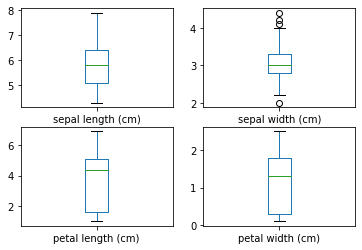

In [30]:
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e2bb98290>,
      dtype=object)

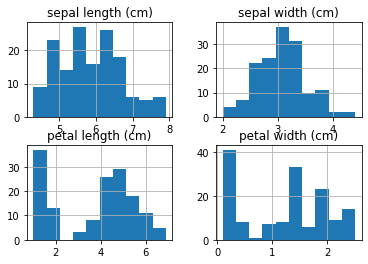

In [31]:
dataset.hist()

**Evaluation**

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
models = []
models.append(("log", LogisticRegression()))
models.append(("lda", LinearDiscriminantAnalysis()))
models.append(("neighbors", KNeighborsClassifier()))
models.append(("bayes", GaussianNB()))
models.append(("svm", SVC()))

results = []
names = []

for (name, model) in models:
  kfold = KFold(n_splits=10, random_state=2)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print ("Name: {2} mean: {0} std {1}".format(cv_results.mean(), cv_results.std(), name))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Name: log mean: 0.9466666666666667 std 0.0581186525805423
Name: lda mean: 0.9666666666666668 std 0.061463629715285906
Name: neighbors mean: 0.9333333333333333 std 0.08432740427115676
Name: bayes mean: 0.9466666666666667 std 0.0581186525805423
Name: svm mean: 0.9333333333333333 std 0.07302967433402213


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [39]:
#lda performs well

lda = LinearDiscriminantAnalysis()
lda.fit_transform(x_train, y_train)
predicted = lda.predict(x_test)
print (accuracy_score(y_test, predicted))
print (confusion_matrix(y_test, predicted))
print (classification_report(y_test, predicted))

1.0
[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

